# Setup Library and Dataset

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Future50.csv')

## Quick Look

In [ ]:
df.shape

(50, 9)

In [ ]:
df.head(3)

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         50 non-null     int64 
 1   Restaurant   50 non-null     object
 2   Location     50 non-null     object
 3   Sales        50 non-null     int64 
 4   YOY_Sales    50 non-null     object
 5   Units        50 non-null     int64 
 6   YOY_Units    50 non-null     object
 7   Unit_Volume  50 non-null     int64 
 8   Franchising  50 non-null     object
dtypes: int64(4), object(5)
memory usage: 3.6+ KB


In [ ]:
temp_df = df.dtypes.value_counts().reset_index()
temp_df

,index,0
0,object,5
1,int64,4


Text(0, 0.5, 'numbwe of features')

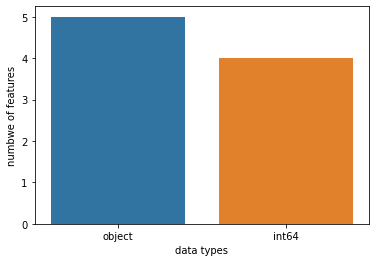

In [ ]:
sns.barplot(x=temp_df['index'],y=temp_df[0])
plt.xlabel('data types')
plt.ylabel('numbwe of features')

# Data Preprocessing

## Missing Value

In [ ]:
df.isnull().sum()

Rank           0
Restaurant     0
Location       0
Sales          0
YOY_Sales      0
Units          0
YOY_Units      0
Unit_Volume    0
Franchising    0
dtype: int64

## Check duplicate value

In [ ]:
df.duplicated().sum()

0

#  Descriptive Analysis

In [ ]:
df.describe()

,Rank,Sales,Units,Unit_Volume
count,50.00000,50.000000,50.000000,50.00000
mean,25.50000,33.780000,34.700000,1592.60000
std,14.57738,9.596534,24.527577,994.67677
min,1.00000,20.000000,7.000000,465.00000
25%,13.25000,24.250000,16.000000,867.50000
50%,25.50000,34.500000,27.000000,1260.00000
75%,37.75000,42.000000,45.500000,2020.00000
max,50.00000,49.000000,105.000000,4300.00000


In [ ]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
Restaurant,50,50,Evergreens,1
Location,50,39,"New York, N.Y.",8
YOY_Sales,50,49,19.5%,2
YOY_Units,50,41,16.7%,4
Franchising,50,2,Yes,29


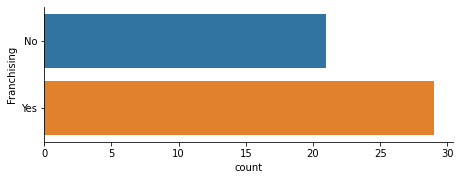

In [ ]:
sns.catplot(y="Franchising", kind="count", data=df, height=2.6, aspect=2.5)
plt.show()

In [ ]:
import plotly.express as px
df['YOY_Sales'] = [str(x).replace('%',' ') for x in df['YOY_Sales']]
#====
df['YOY_Sales']= pd.to_numeric(df['YOY_Sales'])
#===
franch = df.groupby('Franchising',as_index=False).agg({'YOY_Sales':'sum'})
fig = px.bar(franch,
             x='Franchising',
             y='YOY_Sales',
             color='YOY_Sales',
             color_continuous_scale='thermal',
             title='Franchising Or not')
fig.show()

# Quick Classification

In [ ]:
X = df.drop(['Franchising','Restaurant'],1)
y = df['Franchising']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
y.value_counts(normalize=True)

Yes    0.58
No     0.42
Name: Franchising, dtype: float64

In [ ]:
X_dummy = pd.get_dummies(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_dummy,y)

In [ ]:
X_train.shape

(37, 85)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rfc.score(X_test,y_test)

0.6923076923076923

# Conclusion

**EDA**

Restaurant yang memiliki franchising mengalami peningkatan penjualan lebih tinggi dari tahun ke tahun.

**Model**

Random Forest memiliki akurasi sekitar 69,2% yang lebih besar dari treshold. Jadi model memiliki hasil yang lebih baik.